# Loss surface plots for MADL and Augmented MADL

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LightSource


from pathlib import Path
import sys
parent_dir = Path().resolve().parent
sys.path.insert(0, str(parent_dir))
from libs.models import *
from libs.functions import *

%load_ext autoreload
%autoreload 2

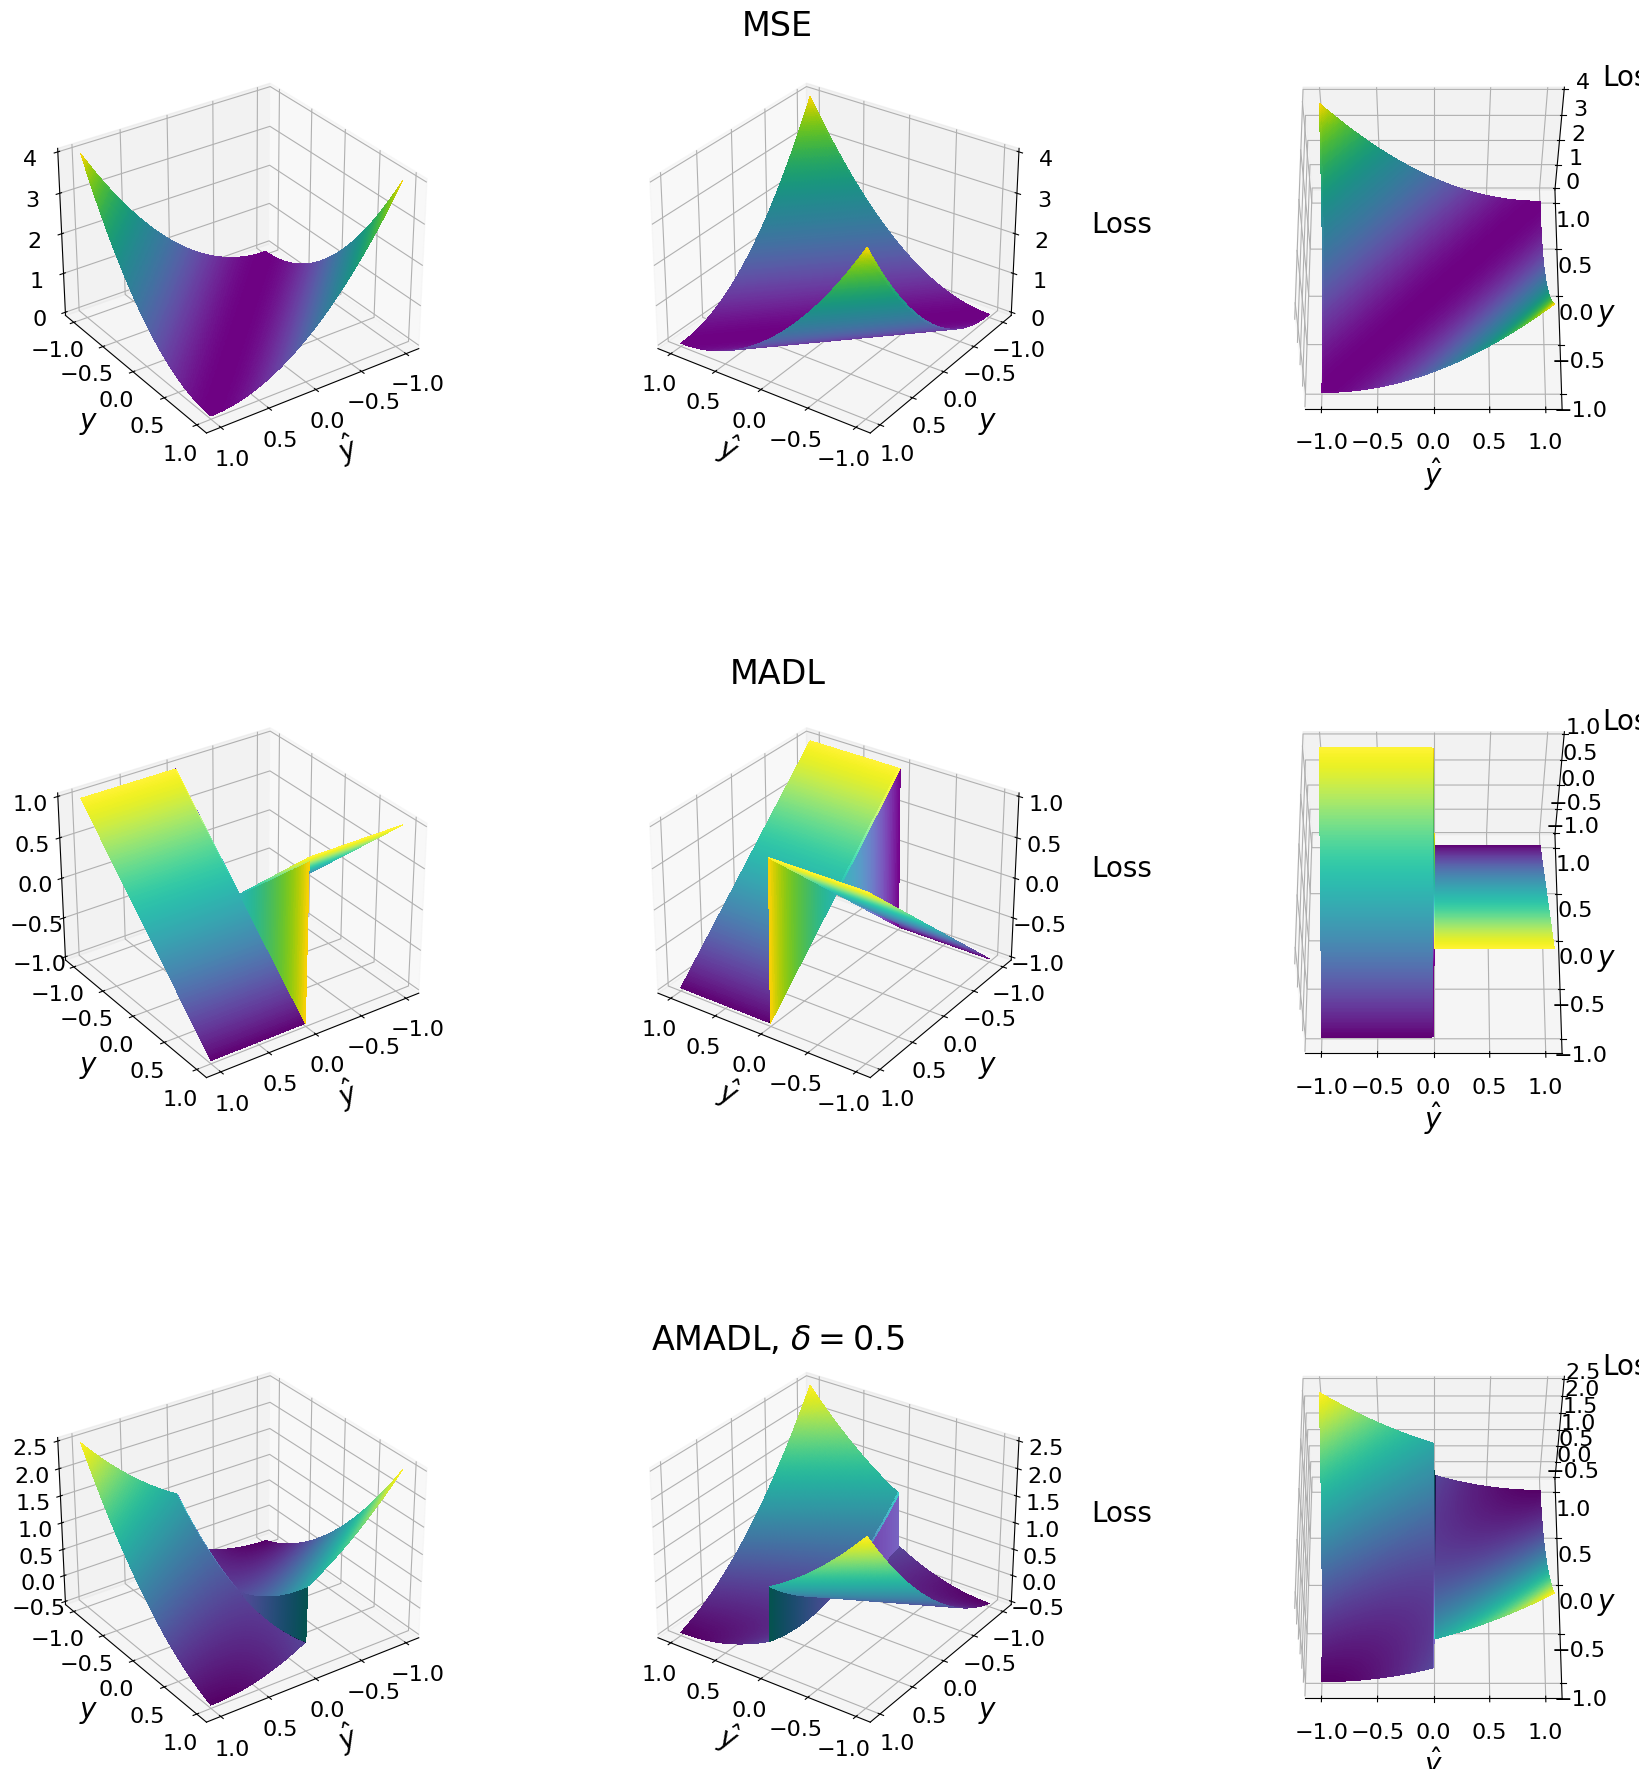

In [2]:

# common grid & angles
grid = np.linspace(-1, 1, 200)
YHAT, Y = np.meshgrid(grid, grid)
angles = [(30, 55), (30, 125), (60, 270)]

# compute surfaces & shading
ls        = LightSource(azdeg=315, altdeg=45)
Z_mse     = (YHAT - Y)**2
rgb_mse   = ls.shade(Z_mse, cmap=cm.viridis, vert_exag=1, blend_mode='soft')
Z_madl    = madl_elementwise(YHAT, Y)
rgb_madl  = ls.shade(Z_madl, cmap=cm.viridis, vert_exag=1, blend_mode='soft')
Z_amadl   = amadl_elementwise(YHAT, Y, delta=0.5)
rgb_amadl = ls.shade(Z_amadl, cmap=cm.viridis, vert_exag=1, blend_mode='soft')

# create 3×3 3D grid
fig, axes = plt.subplots(
    3, 3,
    figsize=(18, 18),
    subplot_kw={'projection': '3d'}
)

# --- MSE row ---
for ax, (elev, azim) in zip(axes[0], angles):
    ax.plot_surface(
        YHAT, Y, Z_mse,
        rstride=1, cstride=1,
        facecolors=rgb_mse,
        linewidth=0, antialiased=False, shade=False
    )
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel(r'$\hat y$', fontsize=20, labelpad=10)
    ax.set_ylabel(r'$y$',      fontsize=20, labelpad=10)
    ax.set_zlabel('Loss',      fontsize=20, labelpad=25)
    ax.set_xticks(np.arange(-1, 1.1, 0.5))
    ax.set_yticks(np.arange(-1, 1.1, 0.5))
    ax.tick_params(labelsize=16)

# --- MADL row ---
for ax, (elev, azim) in zip(axes[1], angles):
    ax.plot_surface(
        YHAT, Y, Z_madl,
        rstride=1, cstride=1,
        facecolors=rgb_madl,
        linewidth=0, antialiased=False, shade=False
    )
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel(r'$\hat y$', fontsize=20, labelpad=10)
    ax.set_ylabel(r'$y$',      fontsize=20, labelpad=10)
    ax.set_zlabel('Loss',      fontsize=20, labelpad=25)
    ax.set_xticks(np.arange(-1, 1.1, 0.5))
    ax.set_yticks(np.arange(-1, 1.1, 0.5))
    ax.tick_params(labelsize=16)

# --- AMADL row ---
for ax, (elev, azim) in zip(axes[2], angles):
    ax.plot_surface(
        YHAT, Y, Z_amadl,
        rstride=1, cstride=1,
        facecolors=rgb_amadl,
        linewidth=0, antialiased=False, shade=False
    )
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel(r'$\hat y$', fontsize=20, labelpad=10)
    ax.set_ylabel(r'$y$',      fontsize=20, labelpad=10)
    ax.set_zlabel('Loss',      fontsize=20, labelpad=25)
    ax.set_xticks(np.arange(-1, 1.1, 0.5))
    ax.set_yticks(np.arange(-1, 1.1, 0.5))
    ax.tick_params(labelsize=16)

# row‐titles
fig.text(0.5, 0.98, 'MSE',   ha='center', fontsize=24)
fig.text(0.5, 0.62, 'MADL',  ha='center', fontsize=24)
fig.text(0.5, 0.25, 'AMADL, $\delta = 0.5$', ha='center', fontsize=24)

# spacing
fig.subplots_adjust(
    left=0.08, right=0.98,
    top=0.97, bottom=0.03,
    hspace=0.6, wspace=0.4
)

plt.savefig('../figs/loss_surface.png', dpi=300)
plt.show()
